In [49]:
# Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Options pour l'affichage des DataFrames
pd.set_option('display.max_columns', None)


In [50]:
# Charger le fichier CSV des émissions de GES
data = pd.read_csv('emissions_ges_france.csv')

# Afficher les premières lignes pour vérifier les données
data.head()


,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357
4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756


In [51]:
# Statistiques descriptives
data.describe()

# Aperçu des colonnes disponibles
print(data.columns)


Index(['INSEE commune', 'Commune', 'Agriculture', 'Autres transports',
       'Autres transports international', 'CO2 biomasse hors-total', 'Déchets',
       'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier',
       'Tertiaire'],
      dtype='object')


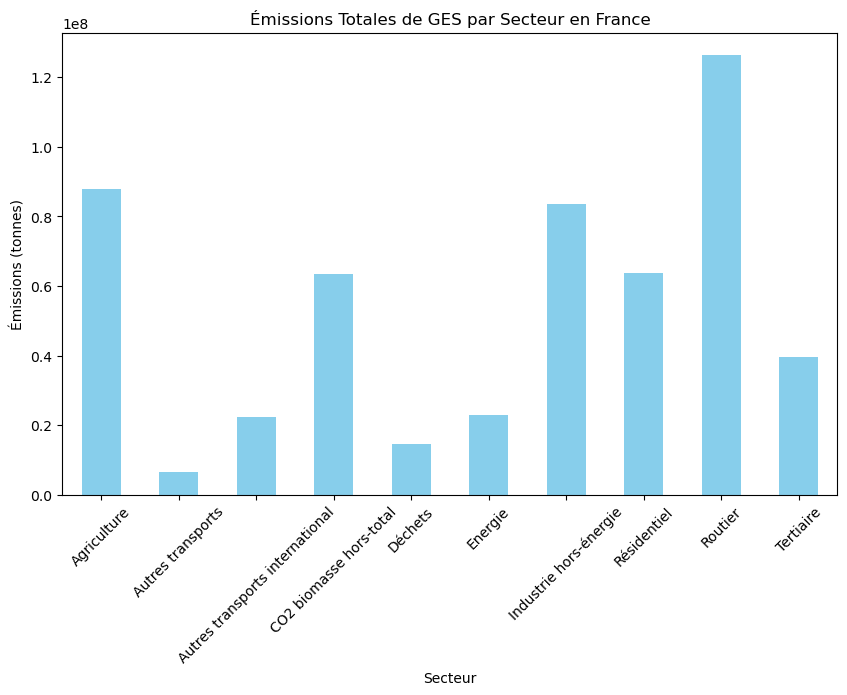

In [52]:
# Sélection des colonnes d'émission (en excluant les colonnes d'identification des communes)
emission_columns = ['Agriculture', 'Autres transports', 'Autres transports international', 
                    'CO2 biomasse hors-total', 'Déchets', 'Energie', 'Industrie hors-énergie',
                    'Résidentiel', 'Routier', 'Tertiaire']

# Calcul des émissions totales par secteur
total_emissions = data[emission_columns].sum()

# Visualisation sous forme de graphique
plt.figure(figsize=(10,6))
total_emissions.plot(kind='bar', color='skyblue')
plt.title('Émissions Totales de GES par Secteur en France')
plt.xlabel('Secteur')
plt.ylabel('Émissions (tonnes)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Ajouter une colonne d'émissions totales
data['Emissions Totales'] = data[emission_columns].sum(axis=1)

# Charger les coordonnées des communes (assurez-vous d'avoir un fichier avec les coordonnées des communes)
coordinates = pd.read_csv('communes_coordinates.csv', sep='|')

# Mettre en majuscule la colonne 'Commune' pour faciliter la fusion
coordinates['Commune'] = coordinates['Commune'].str.upper()

# Fusionner les données d'émissions avec les coordonnées
data_geo = data.merge(coordinates, on='Commune')

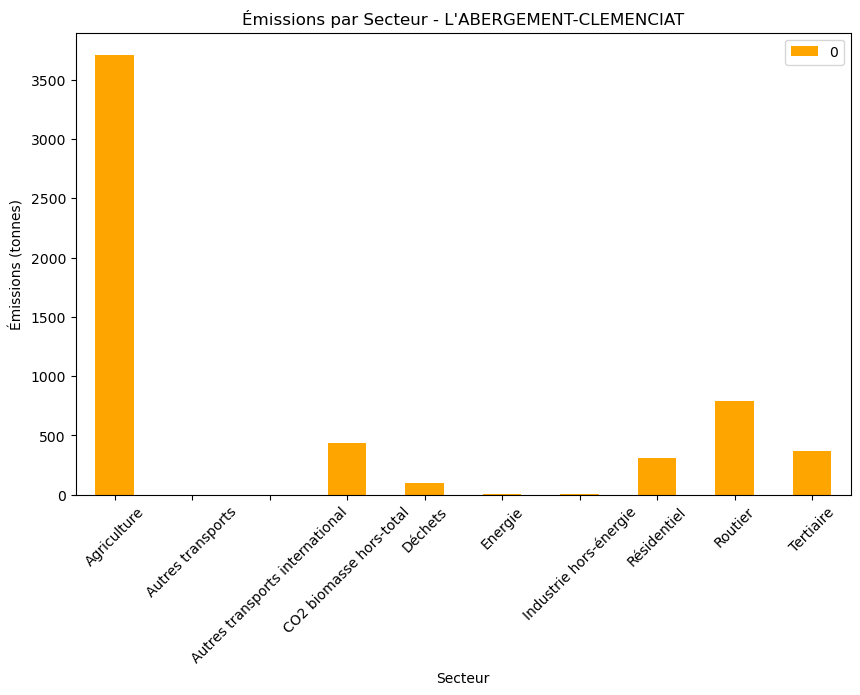

In [64]:
# Filtrer les données pour la commune de L'ABERGEMENT-CLEMENCIAT
commune_data = data[data['Commune'] == "L'ABERGEMENT-CLEMENCIAT"]

# Visualisation des émissions par secteur pour cette commune
commune_data[emission_columns].T.plot(kind='bar', figsize=(10,6), color='orange')
plt.title("Émissions par Secteur - L'ABERGEMENT-CLEMENCIAT")
plt.xlabel('Secteur')
plt.ylabel('Émissions (tonnes)')
plt.xticks(rotation=45)
plt.show()


C:\Users\ktzke\AppData\Local\Temp\ipykernel_3028\1606467688.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Commune', y='Emissions Totales', data=data_comparaison, palette='Blues_d')


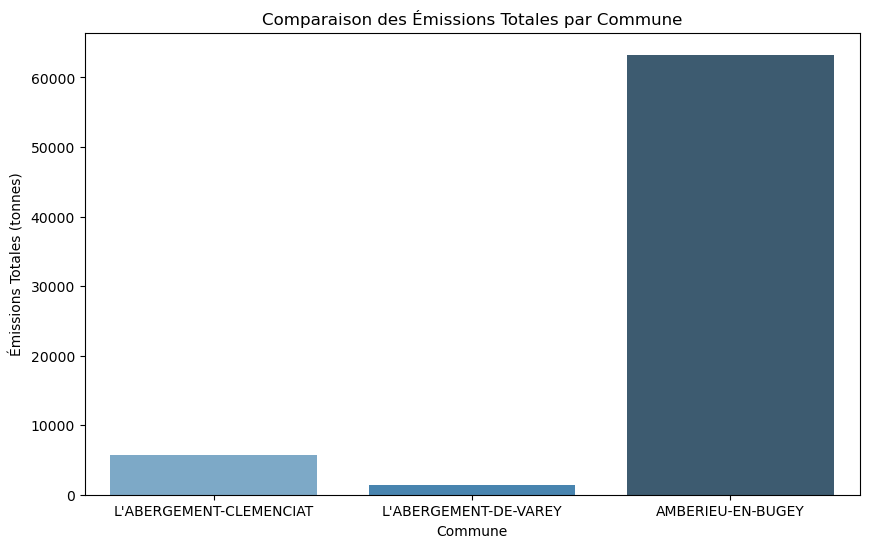

In [65]:
# Sélection des communes spécifiques pour comparaison
communes_comparaison = ['L\'ABERGEMENT-CLEMENCIAT', 'AMBERIEU-EN-BUGEY', 'L\'ABERGEMENT-DE-VAREY']

# Filtrer les données pour ces communes
data_comparaison = data[data['Commune'].isin(communes_comparaison)]

# Visualisation des émissions totales pour ces communes
plt.figure(figsize=(10,6))
sns.barplot(x='Commune', y='Emissions Totales', data=data_comparaison, palette='Blues_d')
plt.title('Comparaison des Émissions Totales par Commune')
plt.ylabel('Émissions Totales (tonnes)')
plt.show()
